In [157]:
import numpy as np
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt



In [158]:
h_bar = 197.3 #c^2 MeV fm
m_p = 4 * 931.494 # MeV c^2 -- mass of alpha particle
q_e = 1.44 #ke^2
e_p = 2 #number of protons in alpha particle
Polonium_212 = [208, -40, 84] #atomic number, nuclear strong force MeV, number of protons
N = 2000 #nsteps
r = np.linspace(0.0, 27, N, endpoint=False) #fm

In [159]:
def potential(atom_profile, x) :
    R_0 = 1.2 * ((atom_profile[0] - 4)**(1/3) + 4**(1/3))
    if x < R_0 :
        #print(atom_profile[1])
        return atom_profile[1]
    else :
        return  ((2 * (atom_profile[2] - 2))/ (x)) * q_e


In [160]:
def calculate_potential(atom_profile, r) :
    v_diag = np.zeros(N)
    for i in range(len(r)) :
        v_diag[i] = potential(atom_profile, r[i])
    potential_term = sparse.diags((v_diag))
    return potential_term

In [161]:
def calculate_laplace(r):
    d = r[1] - r[0]
    main_diag = -2.0 / d**2 * np.ones(N)     
    off_diag  =  1.0 / d**2 * np.ones(N - 1)
    laplace_term = sparse.diags([main_diag, off_diag, off_diag], (0, -1, 1))
    return laplace_term
     

In [162]:
def build_hamiltonian(r):
    laplace_term =   calculate_laplace(r)
    #angular_term =   calculate_angular_term(r)
    potential_term = calculate_potential(Polonium_212, r)
     
    hamiltonian = ((-h_bar**2 / (2.0 * m_p)) * (laplace_term)) - potential_term
 
    return hamiltonian

In [170]:
def plot(r, densities, eigenvalues):
    
    plt.xlabel('x ($\\mathrm{\AA}$)')
    plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')
    energies = ['E = {: >5.2f} MeV'.format(eigenvalues[i].real /((2))) for i in range(3)]
    plt.plot(r * 1e+10, (densities[0]) , color='blue',  label=energies[0])
    plt.plot(r * 1e+10, (densities[1]), color='green', label=energies[1])
    plt.plot(r * 1e+10, (densities[2]), color='red',   label=energies[2])
    #plt.plot(r * 1e+10, (densities[0]) , color='blue')
    #plt.plot(r * 1e+10, (densities[1]), color='green')
    #plt.plot(r * 1e+10, (densities[2]), color='red')
    plt.legend()
    plt.show()
    return

In [169]:
def plot2(r):
    v_diag = np.zeros(N)
    for i in range(len(r)) :
        v_diag[i] = potential(Polonium_212, r[i])
    plt.plot(r * 1e+10, v_diag, color='black',  label='potential')
    plt.xlabel('x ($\\mathrm{\AA}$)')
    plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')
    plt.show()
    return



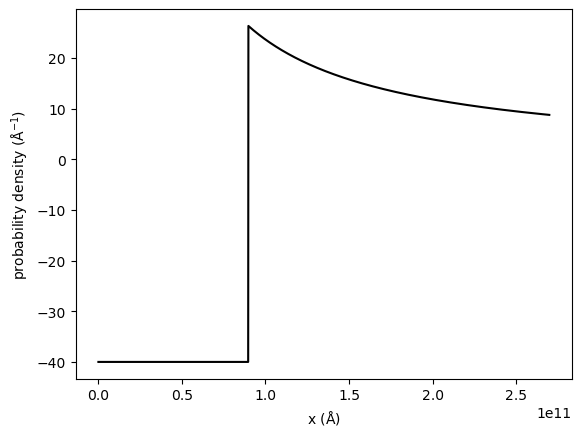

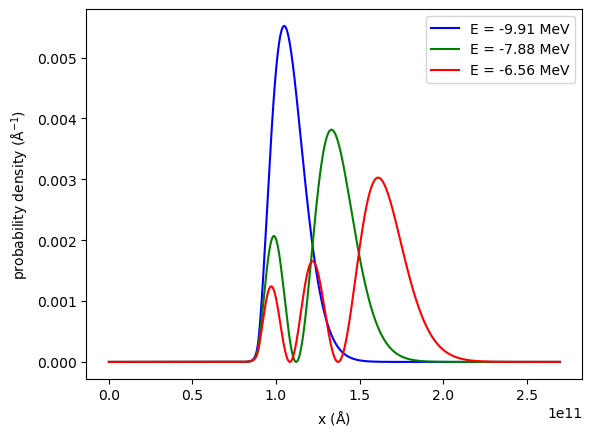

In [172]:
hamiltonian = build_hamiltonian(r)
 
""" solve eigenproblem """
#E, psi_E=eigh(hamiltonian)
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SR')
 
""" sort eigenvalue and eigenvectors """
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)

""" compute probability density for each eigenvector """
densities = [(np.absolute(eigenvectors[i, :])**2 ) for i in range(len(eigenvalues))]
 
""" plot results """
plot2(r)
plot(r, densities, eigenvalues) 

In [166]:
hamiltonian = build_hamiltonian(r)
num_eigenvalues = 5  # specify the number of eigenvalues to find
eigenvalues = find_eigenvalues(hamiltonian, num_eigenvalues)
""" compute probability density for each eigenvector """
densities = [(np.absolute(eigenvectors[i, :])**2 ) for i in range(len(eigenvalues))]
 
""" plot results """

plot(r, densities, eigenvalues) 

NotImplementedError: subtracting a nonzero scalar from a sparse array is not supported

In [ ]:
hamiltonian = build_hamiltonian(r)
 
""" solve eigenproblem """
#E, psi_E=eigh(hamiltonian)
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
 
""" sort eigenvalue and eigenvectors """
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)

""" compute probability density for each eigenvector """
densities = [(np.absolute(eigenvectors[i, :])**2 ) for i in range(len(eigenvalues))]
 
""" plot results """

plot(r, densities, eigenvalues) 

In [ ]:
#hamiltonian = build_hamiltonian(r)
#def find_energy_eigen(matrix):
    #eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    #return eigenvalues, eigenvectors

# Find energy eigenvalues and eigenvectors
#energy_eigenvalues, energy_eigenvectors = find_energy_eigen(build_hamiltonian(r))


In [ ]:
""" compute probability density for each eigenvector """
#densities = [(np.absolute(eigenvectors[i, :])**2 ) for i in range(len(eigenvalues))]
 
""" plot results """

#plot(r, densities, eigenvalues) 

' plot results '

In [ ]:
#calculate_potential(Polonium_212, r)
#calculate_laplace(r)
#build_hamiltonian(r)